## Saturation analyses on the Lx

Saturation analyses, using recall generaeted from 06-recall_one_null_distr. Where a single null distribution was used. Conclusion that using sampled null distribution per gene vs using a single null distribution for all genes does not make a difference on the recall scores generally, and saturation analyses results were similar.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dir_Lx = './tmp/'
recall_cutoff = 0.95
model_name = 'topfeat'

In [42]:
def getPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/model_results_L%s_reg_rf_boruta_%s.csv' % (dir_Lx, x, model_name))
    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall_1null > cutoff)
                
    return n_pass/n_total, np.nanmean(df_results.corr_test)

#### based on reduced model

In [43]:
df_stats = {'Lx':[], 'recall_pct':[], 'mean_corr':[]}
for x in [25,75,100,200,300]:
    df_stats['Lx'].append(x)
    recall_pct, mean_corr = getPct(x, model_name, recall_cutoff)
    df_stats['recall_pct'].append(recall_pct)
    df_stats['mean_corr'].append(mean_corr)
df_stats = pd.DataFrame(df_stats)

In [44]:
df_stats

,Lx,recall_pct,mean_corr
0,25,0.207513,0.111615
1,75,0.426740,0.224617
2,100,0.418692,0.237213
3,200,0.518234,0.297754
4,300,0.592000,0.345809


[Text(0,0.5,'% targets with recall > 0.95'), Text(0.5,0,'Lx')]

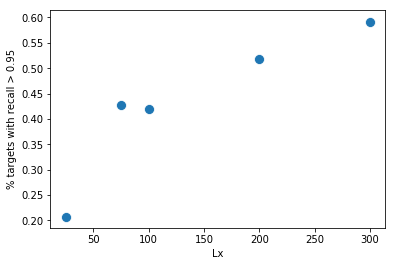

In [45]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0,0.5,'Mean correlation (rho)'), Text(0.5,0,'Lx')]

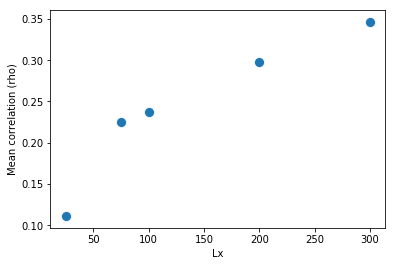

In [46]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')